# `pandas` 101

- [official docs](http://pandas.pydata.org/pandas-docs/stable/index.html)

- name from "panel data" in econometrics, created by Wes McKinney

- designed for split-apply-combine and time-series manipulations, combines many behaviors of R's `plyr`, `reshape2`, ... packages into one

- generally favor *immutability* (most operations will / should produce new objects)

- fundamental data structures: Series, DataFrame

## part 0: check your installs

Already have `pandas` installed? Use the `script` [magic function](http://nbviewer.ipython.org/urls/raw.github.com/ipython/ipython/1.x/examples/notebooks/Cell%20Magics.ipynb) below to see. If its not installed, get your `pip` on and get all the packages from my email.

In [288]:
%%script bash
whoami
pip freeze | grep "pandas\|numpy\|matplotlib"

jmontague
matplotlib==1.2.1
numpy==1.8.0
pandas==0.12.0


In [289]:
# import naming conventions 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
# (further reading on mpl imports: http://bit.ly/197aGoq )

## part 1: data structures

There are two\* main structures in `pandas`: Series (1-dimensional labeled array) and DataFrame (2-dimensional labeled structure).


\* there is also a TimeSeries (a flavor of Series that contains datetimes), Panel (3-dimensional), and Panel4D (4-dimensional). The last two are 'less used,' according to the docs. I haven't experimented with them yet.

### Series (1D)

Series can hold any data type, and the axis label is called an index. Series is dict-like in that you can get and set values by index label. 

In [290]:
s1 = pd.Series([1,3,5,np.nan,6,8])
s1

0     1
1     3
2     5
3   NaN
4     6
5     8
dtype: float64

In [291]:
# by default (without specifying them explicitly), the index label is just an int
s1[5]

8.0

### DataFrame (2D)

Columns can be of different data types. Index and column names are optional. If individual Series have different indexes, the DataFrame index will be the union of the individual ones.

Can create from:

- dict of 1D ndarrays, lists, dicts, or Series

- 2-D numpy.ndarray

- Series

- another DataFrame


N.B.: there are other helper methods for constructing DataFrames from varying data types; [see the docs](http://pandas.pydata.org/pandas-docs/stable/dsintro.html#alternate-constructors) for more options.

In [292]:
# create a couple more Series
s2, s3 = pd.Series(randn(6)), pd.Series(randn(6))

In [293]:
# combine multiple Series into a DataFrame with column labels
df_1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3})

df_1

A         B         C
0   1  0.576615  1.385891
1   3  0.130062  0.236568
2   5 -0.138520 -0.774638
3 NaN -1.751031 -2.397226
4   6  0.584955  0.453002
5   8  1.321706 -0.635372

In [294]:
# when Series are different lengths, DataFrame fills in gaps with NaN
s4 = pd.Series(randn(8))  # whoaaaaaa this Series has extra entries!

df1 = pd.DataFrame({'A': s1, 'B': s2, 'C': s3, 'D': s4})

df1 

A         B         C         D
0   1  0.576615  1.385891 -1.668710
1   3  0.130062  0.236568  0.279692
2   5 -0.138520 -0.774638 -0.121737
3 NaN -1.751031 -2.397226 -0.667562
4   6  0.584955  0.453002  0.724449
5   8  1.321706 -0.635372 -1.131557
6 NaN       NaN       NaN -1.938473
7 NaN       NaN       NaN -1.485025

In [295]:
# create a DataFrame from numpy array
df2 = pd.DataFrame(np.random.randn(6,4))

df2             # can only have one 'pretty' output per cell (if it's the last command)

#print df2       # otherwise, can print arb number of results w/o pretty format
#print df1       # (uncomment both of these print statements)

0         1         2         3
0  0.222197  0.089529 -0.967536 -1.860406
1  1.633746 -1.375822 -1.188369 -0.431517
2  0.733057  0.273193  1.037575  0.932376
3  1.209784 -0.889278 -0.678775 -0.241907
4 -0.048277  1.010586 -0.934808 -0.309902
5  0.226390 -0.928680  0.439817  0.287622

Can inspect your DataFrames with head() and tail() methods - takes a number of lines as an argument. 

Without specifiying them, DataFrames have default index and column name attributes.

In [296]:
# recall current dataframe 
df2.head(2)

0         1         2         3
0  0.222197  0.089529 -0.967536 -1.860406
1  1.633746 -1.375822 -1.188369 -0.431517

But you can assign to those attributes of the DataFrame...

In [297]:
cols = ['a', 'b', 'c', 'd']

# assign columns attribute (names) 
df2.columns = cols

# create an index:
#  generate a sequence of dates with pandas' data_range() method,
#  then assign the index attribute
dates = pd.date_range(start='2013-11-24 13:45:27', freq='W', periods=6)
df2.index = dates

df2

a         b         c         d
2013-11-24 13:45:27  0.222197  0.089529 -0.967536 -1.860406
2013-12-01 13:45:27  1.633746 -1.375822 -1.188369 -0.431517
2013-12-08 13:45:27  0.733057  0.273193  1.037575  0.932376
2013-12-15 13:45:27  1.209784 -0.889278 -0.678775 -0.241907
2013-12-22 13:45:27 -0.048277  1.010586 -0.934808 -0.309902
2013-12-29 13:45:27  0.226390 -0.928680  0.439817  0.287622

In [298]:
# an aside: inspecting the dates object...
print 'what is a date_range object?\n\n', dates

what is a date_range object?

<class 'pandas.tseries.index.DatetimeIndex'>
[2013-11-24 13:45:27, ..., 2013-12-29 13:45:27]
Length: 6, Freq: W-SUN, Timezone: None


Do some indexing / subsetting...

In [299]:
# select a row by index label by using .loc 
df2.loc['2013-12-01 13:45:27']

a    1.633746
b   -1.375822
c   -1.188369
d   -0.431517
Name: 2013-12-01 13:45:27, dtype: float64

In [300]:
# select a single element
df2.loc['2013-12-22 13:45:27','c']

-0.93480829331955795

In [301]:
# select a set of rows --- n.b.: this is broken, possibly a bug with DateTimeIndex labels
df2.loc[['2013-12-01 13:45:27','2013-12-08 13:45:27']]

a   b   c   d
2013-12-01 13:45:27 NaN NaN NaN NaN
2013-12-08 13:45:27 NaN NaN NaN NaN

Sadness!!

To make up for the sadness of that last cell, here's an example that does work from the docs....

In [302]:
# new dataframe with random numbers
df1 = pd.DataFrame(np.random.randn(6,4), index=list('abcdef'),columns=list('ABCD'))

df1

A         B         C         D
a -0.553851 -0.442688 -1.481071 -1.179133
b -0.878415  1.010375 -1.842415 -2.348369
c -0.226095  0.161356 -0.404619 -0.878751
d -1.100107 -0.654925 -2.746951  0.075428
e -0.237524  1.665450 -1.210409  0.495076
f -0.436833  0.130427  0.679888 -0.116238

In [303]:
# address two separate rows, and a range of three columns
df1.loc[['d','f'],'A':'C']

A         B         C
d -1.100107 -0.654925 -2.746951
f -0.436833  0.130427  0.679888

DataFrames have a `melt` method that behaves very similarly to R's `reshape2` package. To convert a 'long' DataFrame back into a 'wide' one, use the `pivot` method.

In [304]:
# .core.* apparently isn't imported with the general 'import pandas'
from pandas.core.reshape import melt

In [305]:
# recall the df we're using
df2

a         b         c         d
2013-11-24 13:45:27  0.222197  0.089529 -0.967536 -1.860406
2013-12-01 13:45:27  1.633746 -1.375822 -1.188369 -0.431517
2013-12-08 13:45:27  0.733057  0.273193  1.037575  0.932376
2013-12-15 13:45:27  1.209784 -0.889278 -0.678775 -0.241907
2013-12-22 13:45:27 -0.048277  1.010586 -0.934808 -0.309902
2013-12-29 13:45:27  0.226390 -0.928680  0.439817  0.287622

In [306]:
# melt and keep 'a' and 'b' columns as id variables (like R)
df3 = melt(df2, id_vars=['a','b'])

df3

a         b variable     value
0   0.222197  0.089529        c -0.967536
1   1.633746 -1.375822        c -1.188369
2   0.733057  0.273193        c  1.037575
3   1.209784 -0.889278        c -0.678775
4  -0.048277  1.010586        c -0.934808
5   0.226390 -0.928680        c  0.439817
6   0.222197  0.089529        d -1.860406
7   1.633746 -1.375822        d -0.431517
8   0.733057  0.273193        d  0.932376
9   1.209784 -0.889278        d -0.241907
10 -0.048277  1.010586        d -0.309902
11  0.226390 -0.928680        d  0.287622

Note that the melted DataFrame lost its indexes. If that index was a measurement or otherwise useful parameter, the approach would be to create a new column with the appropriate values in it, then apply the `melt` - that column could become a variable just as `c` and `d` in the example.

## part 2: data

In the `data/` directory is the sample of parsed twitter data that floats around with gnacs. To create the string of column names, I just used the explain option with all other options.

In [307]:
gnacs_x = "id|postedTime|body|None|['twitter_entiteis:urls:url']|['None']|['actor:languages_list-items']|gnip:language:value|twitter_lang|[u'geo:coordinates_list-items']|geo:type|None|None|None|None|actor:utcOffset|None|None|None|None|None|None|None|None|None|actor:displayName|actor:preferredUsername|actor:id|gnip:klout_score|actor:followersCount|actor:friendsCount|actor:listedCount|actor:statusesCount|Tweet|None|None|None"
colnames = gnacs_x.split('|')

In [308]:
# prevent the automatic compression of wide dataframes (add scroll bar)
pd.set_option("display.max_columns", None)

# get some data, inspect
df1 = pd.read_csv('data/twitter_sample.csv', sep='|', names=colnames)

df1.tail(7)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 88 to 94
Data columns (total 37 columns):
id                                 7  non-null values
postedTime                         7  non-null values
body                               7  non-null values
None                               7  non-null values
['twitter_entiteis:urls:url']      7  non-null values
['None']                           7  non-null values
['actor:languages_list-items']     7  non-null values
gnip:language:value                7  non-null values
twitter_lang                       7  non-null values
[u'geo:coordinates_list-items']    7  non-null values
geo:type                           7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
actor:utcOffset                    7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
actor:displayName                  7  non-null values
actor:preferredUsername            7  non-null values
actor:id                           7  non-null values
gnip:klout_score                   7  non-null values
actor:followersCount               7  non-null values
actor:friendsCount                 7  non-null values
actor:listedCount                  7  non-null values
actor:statusesCount                7  non-null values
Tweet                              7  non-null values
None                               7  non-null values
None                               7  non-null values
None                               7  non-null values
dtypes: int64(5), object(32)

Since there are so many explain fields that come back with 'None', let's just get rid of them for now. 

(In the future, we might try to find a way to make that field more descriptive, too.)

In [309]:
# n.b.: this is an *in-place* delete -- unusual for a pandas structure
del df1['None']

# The command below is how the docs suggest carrying this out (creating a new df). 
#   But, it doesn't seem to work -- possibly due to multiple cols with same name. Oh well. 
#new_df = df1.drop('None', axis=1)  # return new df

In [310]:
# have a peek
df1.tail(6)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 89 to 94
Data columns (total 20 columns):
id                                 6  non-null values
postedTime                         6  non-null values
body                               6  non-null values
['twitter_entiteis:urls:url']      6  non-null values
['None']                           6  non-null values
['actor:languages_list-items']     6  non-null values
gnip:language:value                6  non-null values
twitter_lang                       6  non-null values
[u'geo:coordinates_list-items']    6  non-null values
geo:type                           6  non-null values
actor:utcOffset                    6  non-null values
actor:displayName                  6  non-null values
actor:preferredUsername            6  non-null values
actor:id                           6  non-null values
gnip:klout_score                   6  non-null values
actor:followersCount               6  non-null values
actor:friendsCount                 6  non-null values
actor:listedCount                  6  non-null values
actor:statusesCount                6  non-null values
Tweet                              6  non-null values
dtypes: int64(5), object(15)

## slicing & combining

Subsetting a DataFrame is very similar to the syntax in R. There are two ways to select columns: 'dot' (attribute) notation, and 'square bracket' (index) notation. Sometimes, the column names will dictate which you have to use.

In [311]:
# inspect those rows with twitter-classified lang 'en' (scroll the right to see)
df1[df1.twitter_lang == 'en'].head()

# the colons in the column name below won't allow dot-access to the column, so we can quote them and still filter.
#df1[df1["gnip:language:value"] == 'en'].head()  

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 8 to 15
Data columns (total 20 columns):
id                                 5  non-null values
postedTime                         5  non-null values
body                               5  non-null values
['twitter_entiteis:urls:url']      5  non-null values
['None']                           5  non-null values
['actor:languages_list-items']     5  non-null values
gnip:language:value                5  non-null values
twitter_lang                       5  non-null values
[u'geo:coordinates_list-items']    5  non-null values
geo:type                           5  non-null values
actor:utcOffset                    5  non-null values
actor:displayName                  5  non-null values
actor:preferredUsername            5  non-null values
actor:id                           5  non-null values
gnip:klout_score                   5  non-null values
actor:followersCount               5  non-null values
actor:friendsCount                 5  non-null values
actor:listedCount                  5  non-null values
actor:statusesCount                5  non-null values
Tweet                              5  non-null values
dtypes: int64(5), object(15)

Let's get a subset of this dataframe that has numerical values so we can eventually do some stuff.

In [312]:
# create new dataframe from numerical columns
df2 = df1[["gnip:klout_score","actor:followersCount", "actor:friendsCount", "actor:listedCount"]]

df2.head()

gnip:klout_score  actor:followersCount  actor:friendsCount  actor:listedCount
0               35                   178                 129                  0
1               32                   144                 215                  0
2               18                    37                  54                  0
3               50                   438                 174                  1
4               21                    12                   6                  0

In [313]:
# because I happen to know the answer, let's check data types of the columns...
df2.dtypes  

gnip:klout_score        object
actor:followersCount     int64
actor:friendsCount       int64
actor:listedCount        int64
dtype: object

The `object` type means that the column has multiple types of data in it. This is a good opportunity to 'fix' a section of the DataFrame by way of a function & the `map()` function

In [314]:
# convert ints / strings to floats, give up on anything else (call it 0.0)
def floatify(val):
    if val == None or val == 'None':
        return 0.0
    else:
        return float(val)

In [315]:
# assigning to an existing column overwrites that column 
df2['gnip:klout_score'] = df2['gnip:klout_score'].map(floatify)

# check again
df2.dtypes

gnip:klout_score        float64
actor:followersCount      int64
actor:friendsCount        int64
actor:listedCount         int64
dtype: object

In [316]:
# use all floats just for fun. 
#  this only works if the elements can all be converted to floats (e.g. ints or something python can handle) 
df2 = df2.astype(float)

df2.dtypes

gnip:klout_score        float64
actor:followersCount    float64
actor:friendsCount      float64
actor:listedCount       float64
dtype: object

Since they're all numbers now, we can do math and also add new columns to the DataFrame. Combining values from separate columns occurs on a row-by-row basis, as expected.

In [317]:
# look at some activity ratios - add col to df
df2['fol/fr'] = df2['gnip:klout_score'] / df2['actor:followersCount']

df2.head()

# can also use the built-in describe() method to get quick descriptive stats on the dataframe
#df2.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 5 columns):
gnip:klout_score        5  non-null values
actor:followersCount    5  non-null values
actor:friendsCount      5  non-null values
actor:listedCount       5  non-null values
fol/fr                  5  non-null values
dtypes: float64(5)

## grouping

groupby() is used for the split-apply-combine process. I'm led to believe that this is one of the stronger aspects of `pandas`' approach to DataFrames (versus R's), but haven't yet had a chance to really see the power.

In [318]:
# back to bigger df, without 'None' cols
df1.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5 entries, 0 to 4
Data columns (total 20 columns):
id                                 5  non-null values
postedTime                         5  non-null values
body                               5  non-null values
['twitter_entiteis:urls:url']      5  non-null values
['None']                           5  non-null values
['actor:languages_list-items']     5  non-null values
gnip:language:value                5  non-null values
twitter_lang                       5  non-null values
[u'geo:coordinates_list-items']    5  non-null values
geo:type                           5  non-null values
actor:utcOffset                    5  non-null values
actor:displayName                  5  non-null values
actor:preferredUsername            5  non-null values
actor:id                           5  non-null values
gnip:klout_score                   5  non-null values
actor:followersCount               5  non-null values
actor:friendsCount                 5  non-null values
actor:listedCount                  5  non-null values
actor:statusesCount                5  non-null values
Tweet                              5  non-null values
dtypes: int64(5), object(15)

Use a groupby to collect all rows by language value, and subsequently use some of the methods available to `GroupBy` DataFrames. Note that the `GroupBy` methods will only act on (and the method call only return) values for columns where numerical calculation makes sense.

In [319]:
# subset df, create new df with only 'popular' accounts -- those matching the filter condition given
pop_df = df1[df1["actor:followersCount"] >= 100]

# fix the klout scores again
pop_df['gnip:klout_score'] = pop_df['gnip:klout_score'].map(floatify)

# in case you need to remind yourself of the dataframe
#pop_df.head()

# use GroupBy methods for stats on each group:
pop_df.groupby("twitter_lang").size()      # number of elements per group
#pop_df.groupby("twitter_lang").sum()       # sum of elements in each group (obviously doesn't make sense for some cols) 
#pop_df.groupby("twitter_lang").mean()      # algebraic mean of elements per group

twitter_lang
ar               1
en              34
es              14
fr               1
he               1
id               4
it               2
ja               1
ko               1
lv               1
pl               1
pt              10
tr               5
und              2
vi               1
dtype: int64

In [320]:
# though this looks like a normal dataframe, the DataFrameGroupBy object has a heirarchical index
#  this means it may not act as you might expect.
lang_gb = pop_df[['twitter_lang',\
             'gnip:klout_score',\
             'actor:followersCount',\
             'actor:friendsCount',\
             'actor:statusesCount']].groupby('twitter_lang')


# note the new index 'twitter_lang' -- in this case, .head(n) returns <= n elements for each index
lang_gb.head(2)  

# see that they type is DataFrameGroupBy object
#lang_gb

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 22 entries, (ar, 42) to (vi, 88)
Data columns (total 5 columns):
twitter_lang            22  non-null values
gnip:klout_score        22  non-null values
actor:followersCount    22  non-null values
actor:friendsCount      22  non-null values
actor:statusesCount     22  non-null values
dtypes: float64(1), int64(3), object(1)

In [321]:
# to get a DataFrame object that responds more like I'm used to, create a new one using the 
#   aggregate method, which results in a single-index DataFrame
lang_gb_mean = lang_gb.aggregate(np.mean)  

lang_gb_mean.head()

# verify the single index
#lang_gb_mean.index

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, ar to he
Data columns (total 4 columns):
gnip:klout_score        5  non-null values
actor:followersCount    5  non-null values
actor:friendsCount      5  non-null values
actor:statusesCount     5  non-null values
dtypes: float64(4)

## part 3: plotting

As far as I can tell, plotting in Python was not fun in the past. Below is some easy, base matplotlib, but 'nice' graphics take *a lot* of code. This situation is changing quite quickly now, with the success of `ggplot2` in the R world and the attempts to a) make `matplotlib` look less sucky, and b) implement the Grammar of Graphics in Python.

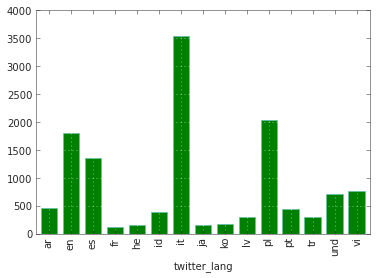

In [322]:
# .plot() is a pandas wrapper for matplotlib's plt.plot() 
lang_gb_mean['actor:followersCount'].plot(kind='bar', color='g')

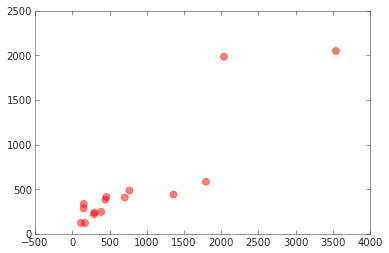

In [323]:
# more base matplotlib 
plt.scatter(x=lang_gb_mean['actor:followersCount'],\
            y=lang_gb_mean['actor:friendsCount'],\
            alpha=0.5,\
            s=50,\
            color='red',\
            marker='o')

array([[<matplotlib.axes.AxesSubplot object at 0x115619050>,
        <matplotlib.axes.AxesSubplot object at 0x114d5d990>]], dtype=object)

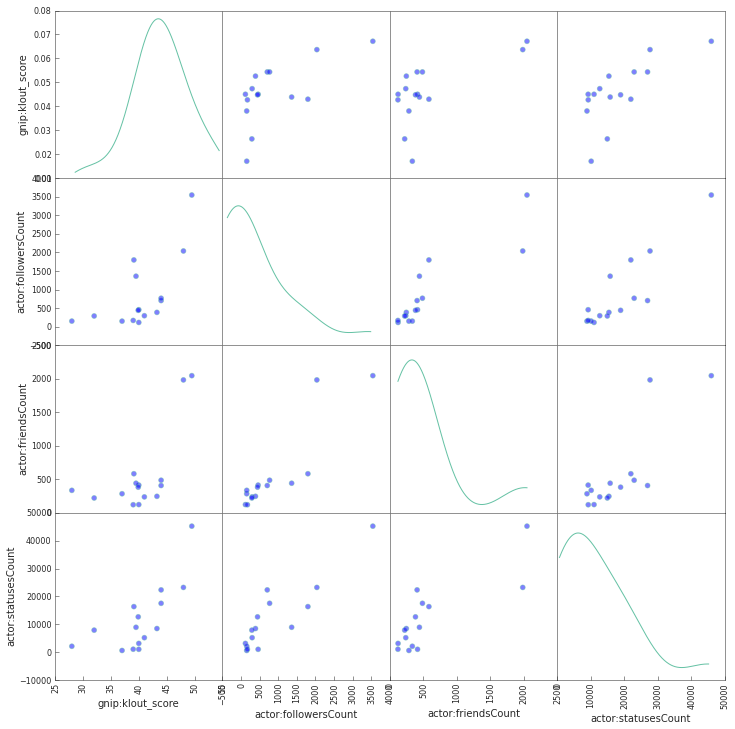

In [324]:
# now read the docs and copypasta a neat-looking plot
from pandas.tools.plotting import scatter_matrix

scatter_matrix(lang_gb_mean, alpha=0.5, figsize=(12,12), diagonal='kde', s=100)

Finally, a short taste of some other plotting libraries. My munging + plotting skillz in this world are still a work in progress, so I will definitely return to this section with an actual use-case in the future. For now, we'll make up some data for illustrative purposes.

In [325]:
# make up some data with large-scale patterns and a datetime index
df = pd.DataFrame(randn(1000, 4), index=pd.date_range('1/1/2000', periods=1000), columns=list('ABCD'))
df = df.cumsum()
df.head()

A         B         C         D
2000-01-01 -0.783106 -1.077485  0.418755 -0.165691
2000-01-02 -1.510181  0.107546  1.572676 -0.890846
2000-01-03 -2.556830 -0.965046  1.176366 -0.770014
2000-01-04 -3.815111 -1.355410  2.915361 -0.285702
2000-01-05 -3.131276 -2.627305  4.319611 -0.575185

array([[<matplotlib.axes.AxesSubplot object at 0x115616ad0>,
        <matplotlib.axes.AxesSubplot object at 0x115ec8310>]], dtype=object)

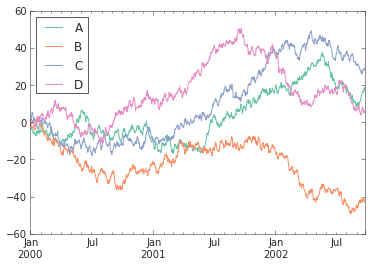

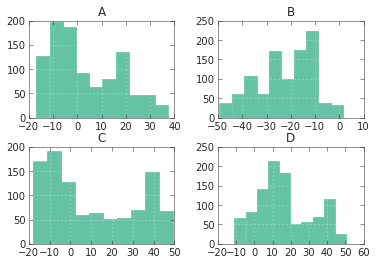

In [326]:
df.plot()
df.hist()

Now, let's use some other matplotlib wrappers to get a sense of how we can make this look a little better....

- `prettyplotlib` essentially just fixes a bunch of matplotlib settings behind the scenes so your base methods lead to e.g. ColorBrewer palettes. This essentially overwrites the .matplotlibrc settings for this session with palettes and settings that are slightly nicer. The settings will remain until you start a new session.

array([[<matplotlib.axes.AxesSubplot object at 0x115fb0b50>,
        <matplotlib.axes.AxesSubplot object at 0x115570990>]], dtype=object)

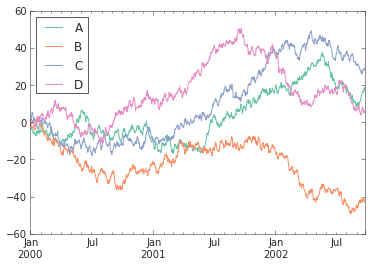

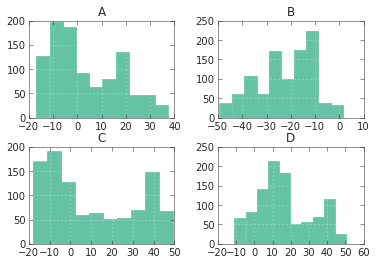

In [327]:
import prettyplotlib

df.plot()
df.hist()

- `ggplot` is a very new port of R's ggplot2 into Python and is in [very active development](https://github.com/yhat/ggplot/blob/master/TODO.md). Much of the really powerful aspects of R's ggplot is yet to be implemented, but even [the man himself](https://github.com/hadley/ggplot) is involved in the development, so be sure to check it out later down the road.

In [328]:
df['date'] = pd.date_range('1/1/2000', periods=1000)
df.head()

A         B         C         D                date
2000-01-01 -0.783106 -1.077485  0.418755 -0.165691 2000-01-01 00:00:00
2000-01-02 -1.510181  0.107546  1.572676 -0.890846 2000-01-02 00:00:00
2000-01-03 -2.556830 -0.965046  1.176366 -0.770014 2000-01-03 00:00:00
2000-01-04 -3.815111 -1.355410  2.915361 -0.285702 2000-01-04 00:00:00
2000-01-05 -3.131276 -2.627305  4.319611 -0.575185 2000-01-05 00:00:00

In [329]:
from ggplot import *
df_lng = pd.melt(df, id_vars='date')

df_lng.head()

date variable     value
0 2000-01-01 00:00:00        A -0.783106
1 2000-01-02 00:00:00        A -1.510181
2 2000-01-03 00:00:00        A -2.556830
3 2000-01-04 00:00:00        A -3.815111
4 2000-01-05 00:00:00        A -3.131276

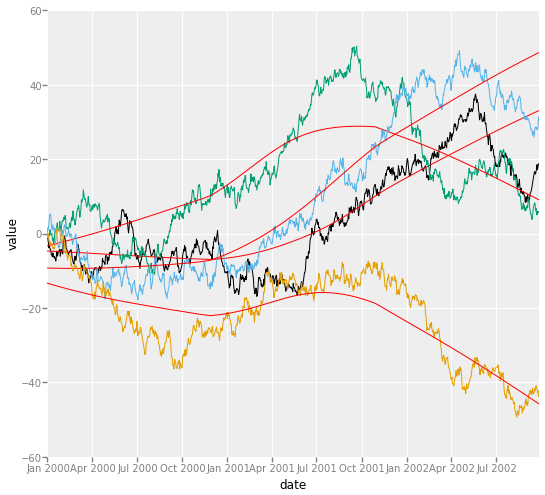

<ggplot: (291441093)>

In [330]:
ggplot(df_lng, aes(x='date', y='value', color='variable')) + \
    geom_line() + \
    stat_smooth(color='red')

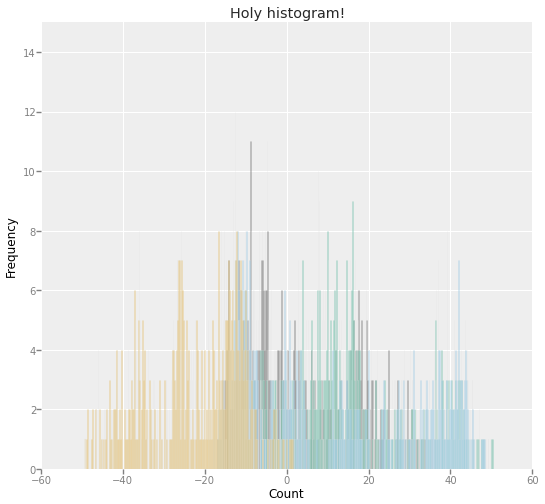

<ggplot: (291476761)>

In [331]:
ggplot(df_lng, aes(x='value', color='variable', alpha=1/2.)) + \
    geom_histogram(binwidth=0.1) + \
    ggtitle("Holy histogram!") + labs("Count", "Frequency") + \
    ylim(0, 15)